## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Yvonne Ryan

Student ID: 21208298

<hr style="border:2px solid gray"> </hr>

## Imports

In [326]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [327]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [451]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [362]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [363]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

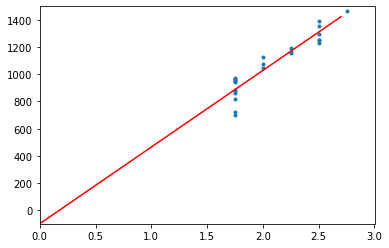

In [364]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

### Solution

First, we define 3 matrix manipulations: Transpose, Multiply and Invert. 

In [365]:
def matrix_tran(A):
    '''
    Calculates the transpose of a matrix A.
    ''' 
    n_rows, n_cols = len(A), len(A[0])
    
    element_list = []
    for i in range(0, n_cols):
        for j in range(0, n_rows):
            element_list.append(A[j][i])
    
    T = []
    for i in range(0, len(element_list), n_rows):
        n = i + n_rows
        T.append(element_list[i:n])

    return T

In [366]:
def matrix_mult(A,B):
    '''
    Calculate the product of 2 matrices.
    '''
    C = [ [] for x in range(0, len(A))]
    
    for i in range(0, len(A)):
        for j in range(0, len(B[0])):
            term = 0
            for k in range(0, len(B)):
                term += A[i][k] * B[k][j]
            C[i].append(term)

    return C    

In [367]:
def matrix_inv(A):
    '''
    Calculate the inverse of a 2x2 matrix.
    '''
    
    def det(A):
        '''
        Calculate the determinant of a 2x2 matrix.
        '''
        return float(A[0][0]*A[1][1]) - (A[0][1]*A[1][0])
    
    A_inv = [[A[1][1], -1 * A[0][1]], [-1 * A[1][0], A[0][0]]]
    for i in range(0,len(A_inv)):
        for j in range(0,len(A_inv[0])):
            A_inv[i][j] *= det(A)**(-1)
            
    return A_inv

For improved readibility, the next function prints list-based matrices in a similar way to how Python prints numpy matrices.

In [534]:
def matrix_print(A):
    '''
    Prints a list-based matrix the same way NumPy matrices are printed.
    '''
    if len(A) == 1:
        string = '[{}]'.format(A[0])
    else:
        string = '[{}\n'.format(A[0])
        for i in range(1,len(A)-1):
            string += ' {}\n'.format(A[i])
        string += ' {}]'.format(A[-1])
    
    return string

Now we reproduce the functions linreg_weights and linreg_predict using these three functions.

In [490]:
def fit(X,y):
    """
    Calculate weights for the linear regression.
    """
    return matrix_mult(matrix_inv(matrix_mult(matrix_tran(X),X)), matrix_mult(matrix_tran(X), y))

In [491]:
def predict(w,X):
    '''
    '''
    output = []
    for x in X:
        list_x = []
        for val in x:
            list_x.append(float(val))

        output.append(matrix_mult(matrix_trans(w), matrix_trans([x]))[0])
    
    return(output)

### Testing

In [548]:
# Test matrices

# M is a 4x3 matrix
M = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]

# N is a 3x2 matrix
N = [[1,2],[3,4],[5,6]]

# P is a 3x3 matrix
P = [[4,5,6],[7,8,9],[10,11,12]]

# A is a 1x2 matrix
A = [[1,2]]

# B is a 2x1 matrix
B = [[2],[3]]

In [546]:
# Demonstrate the matrix_print function

# Change the example matrix here:
matrix = M

print('Print raw list representation of a matrix: \n{}\n'.format(matrix))

print('Print the same matrix in readable manner: \n{}\n'.format(matrix_print(matrix)))

print('Print its transpose: \n{}\n'.format(matrix_print(matrix_trans(matrix))))

Print raw list representation of a matrix: 
[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

Print the same matrix in readable manner: 
[[1, 2, 3]
 [4, 5, 6]
 [7, 8, 9]
 [10, 11, 12]]

Print its transpose: 
[[1, 4, 7, 10]
 [2, 5, 8, 11]
 [3, 6, 9, 12]]



Testing output from the fit function against output from linreg_weights:

In [549]:
print('Output from fit function:\n{}\n'.format(matrix_print(fit(X,y))))
print('Output from linreg_weights function:\n{}\n'.format(linreg_weights(X,y)))

Output from fit function:
[[-99.46431881371245]
 [564.2038924930494]]

Output from linreg_weights function:
[[-99.46431881]
 [564.20389249]]



In [550]:
print('Output from predict function:\n{}\n'.format(matrix_print(predict(fit(X,y),X))))

print('Output from linreg_predict function:\n{}\n'.format(linreg_predict(linreg_weights(X,y),X)))

Output from predict function:
[[1452.0963855421733]
 [1311.045412418911]
 [1311.045412418911]
 [1311.045412418911]
 [1311.045412418911]
 [1311.045412418911]
 [1311.045412418911]
 [1169.9944392956486]
 [1169.9944392956486]
 [1169.9944392956486]
 [1028.9434661723863]
 [1028.9434661723863]
 [1028.9434661723863]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]
 [887.8924930491239]]

Output from linreg_predict function:
[[1452.09638554]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1169.9944393 ]
 [1169.9944393 ]
 [1169.9944393 ]
 [1028.94346617]
 [1028.94346617]
 [1028.94346617]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]]



<hr style="border:2px solid gray"> </hr>

## Reflection

Write your reflection in below cell.